In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sympy import *
from scipy.optimize import fsolve
from scipy.stats import *
from sklearn.preprocessing import StandardScaler,MinMaxScaler
import seaborn as sns
from statsmodels.api import *
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator,MultipleLocator
##################################################
def checker(date):
    if date.month in [1, 12]:
        return True
    return False

def get_year(date):
    return date.year

def to_float(x):
    x = float(x.replace('.','').replace(',', '.'))
    return x

def to_value(x):
    x = float(x[:-1].replace('.','').replace(',', '.'))*1000
    return x

def to_perc(x):
    return float(x[:-1].replace('.','').replace(',', '.'))/100

In [33]:
databook = pd.read_excel('Ozon_Databook_Q3_24.xlsx', 'Public Databook', header = 4)
databook = databook.drop(list(range(0,4))+list(range(8,12))+list(range(15,18))+[21,28,29,30]+list(range(36,54)),axis = 0)
databook= databook.set_index('Unnamed: 0')

for i in range(4):
    databook.insert(i,f'Q{i+1}_18',databook['FY_2018']*(i+1)/10)

for i in range(4):
    databook.insert(i+4,f'Q{i+1}_19',databook['FY_2019']*(i+1)/10)

databook = databook.drop([i for i in databook.columns if 'F' in i]+['Unnamed: 23'],axis=1)

databook = databook.T
databook.columns.name = 'Quarter'
data_cols = databook.columns
databook

Quarter,GMV incl. services,"Share of Marketplace, as % of GMV incl. services","Number of orders, millions","Number of active buyers, millions",Total revenue,(Loss)/profit for the period,Adjusted EBITDA,Total non-current assets,Total current assets,Cash and cash equivalents,...,Total equity,Total non-current liabilities,Total current liabilities,Total liabilities,Total equity and liabilities,Movements in working capital1,Net cash (used in) / generated from operating activities1,Capital expenditures,Net cash (used in)/ generated from investing activities,Net cash(used in)/ generated from financing activities2
Q1_18,4188.818931,0.000871,1.528649,0.480000,3722.0,-566.1,-530.500000,646.8,1161.2,268.4,...,323.600,58.4,1426.0,1484.4,1808.000,151.7,-359.9,-256.5,-286.3,527.0
Q2_18,8377.637862,0.001742,3.057297,0.960000,7444.0,-1132.2,-1061.000000,1293.6,2322.4,536.8,...,647.200,116.8,2852.0,2968.8,3616.000,303.4,-719.8,-513.0,-572.6,1054.0
Q3_18,12566.456792,0.002614,4.585946,1.440000,11166.0,-1698.3,-1591.500000,1940.4,3483.6,805.2,...,970.800,175.2,4278.0,4453.2,5424.000,455.1,-1079.7,-769.5,-858.9,1581.0
Q4_18,16755.275723,0.003485,6.114594,1.920000,14888.0,-2264.4,-2122.000000,2587.2,4644.8,1073.6,...,1294.400,233.6,5704.0,5937.6,7232.000,606.8,-1439.6,-1026.0,-1145.2,2108.0
Q1_19,8081.486742,0.017378,3.181056,0.790000,6010.4,-1936.3,-1583.200000,1956.8,1886.7,300.3,...,81.700,811.2,2950.6,3761.8,3843.500,101.5,-1431.2,-476.8,-453.9,1933.5
Q2_19,16162.973484,0.034755,6.362112,1.580000,12020.8,-3872.6,-3166.400000,3913.6,3773.4,600.6,...,163.400,1622.4,5901.2,7523.6,7687.000,203.0,-2862.4,-953.6,-907.8,3867.0
Q3_19,24244.460225,0.052133,9.543168,2.370000,18031.2,-5808.9,-4749.600000,5870.4,5660.1,900.9,...,245.100,2433.6,8851.8,11285.4,11530.500,304.5,-4293.6,-1430.4,-1361.7,5800.5
Q4_19,32325.946967,0.069511,12.724224,3.160000,24041.6,-7745.2,-6332.800000,7827.2,7546.8,1201.2,...,326.800,3244.8,11802.4,15047.2,15374.000,406.0,-5724.8,-1907.2,-1815.6,7734.0
Q4_20,75847.502151,0.522714,29.610823,13.760362,37751.0,-9407.0,-3576.000000,29800.0,124808.0,103702.0,...,79257.000,15140.0,60211.0,75351.0,154608.000,15886.0,10644.0,-2059.0,-1966.0,91846.0
Q1_21,74208.000000,0.583574,34.100000,16.000000,33407.0,-6734.0,-4855.000000,33652.0,162747.0,140584.0,...,73273.000,71767.0,51359.0,123126.0,196399.000,-5890.0,-12118.0,-1955.0,-1597.0,47697.0


In [34]:
databook.columns = [i if i[len(i)-1]!=' ' else i[:-1] for i in databook.columns]
databook.columns = [i if i[len(i)-1]!=' ' else i[:-1] for i in databook.columns]
databook.columns

Index(['GMV incl. services',
       'Share of Marketplace, as % of GMV incl. services',
       'Number of orders, millions', 'Number of active buyers, millions',
       'Total revenue', '(Loss)/profit for the period', 'Adjusted EBITDA',
       'Total non-current assets', 'Total current assets',
       'Cash and cash equivalents', 'Total assets', 'Total equity',
       'Total non-current liabilities', 'Total current liabilities',
       'Total liabilities', 'Total equity and liabilities',
       'Movements in working capital1',
       'Net cash (used in) / generated from operating activities1',
       'Capital expenditures',
       'Net cash (used in)/ generated from investing activities',
       'Net cash(used in)/ generated from financing activities2'],
      dtype='object')

In [35]:
el_exog_cols = np.array(exog_cols)[[i for i in range(20) if i not in [1,3,4,5,6,11,12,13,17,19]]]
el_exog_cols

array(['GMV incl. services', 'Number of active buyers, millions',
       'Total current assets', 'Cash and cash equivalents',
       'Total assets', 'Total equity', 'Total equity and liabilities',
       'Movements in working capital1',
       'Net cash (used in) / generated from operating activities1',
       'Net cash (used in)/ generated from investing activities'],
      dtype='<U57')

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     OLS Regression Results                                    
===============================================================================================
Dep. Variable:     Number of orders, millions   R-squared (uncentered):                   1.000
Model:                                    OLS   Adj. R-squared (uncentered):              1.000
Method:                         Least Squares   F-statistic:                          1.299e+04
Date:                         Чт, 12 дек 2024   Prob (F-statistic):                    5.57e-26
Time:                                12:45:25   Log-Likelihood:                         -47.150
No. Observations:                          24   AIC:                                      114.3
Df Residuals:                              14   BIC:                                      126.1
Df Model:                                  10                                                  
Covariance Type:                    nonrobust                                                  
=============================================================================================================================
                                                                coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------
GMV incl. services                                          268.4647     21.973     12.218      0.000     221.338     315.591
Number of active buyers, millions                           107.9043     12.790      8.436      0.000      80.472     135.337
Total current assets                                        416.9945     55.745      7.480      0.000     297.434     536.555
Cash and cash equivalents                                  -181.0222     26.295     -6.884      0.000    -237.418    -124.626
Total assets                                               1.067e+07   4.58e+06      2.328      0.035     8.4e+05    2.05e+07
Total equity                                                -42.9448      8.465     -5.073      0.000     -61.101     -24.789
Total equity and liabilities                              -1.067e+07   4.58e+06     -2.328      0.035   -2.05e+07   -8.41e+05
Movements in working capital1                               -50.4180      9.938     -5.073      0.000     -71.733     -29.103
Net cash (used in) / generated from operating activities1    72.6458     14.108      5.149      0.000      42.388     102.904
Net cash (used in)/ generated from investing activities      17.7192      4.438      3.993      0.001       8.201      27.238
==============================================================================
Omnibus:                        0.209   Durbin-Watson:                   2.228
Prob(Omnibus):                  0.901   Jarque-Bera (JB):                0.400
Skew:                           0.139   Prob(JB):                        0.819
Kurtosis:                       2.432   Cond. No.                     1.91e+07
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The smallest eigenvalue is 1.21e-13. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

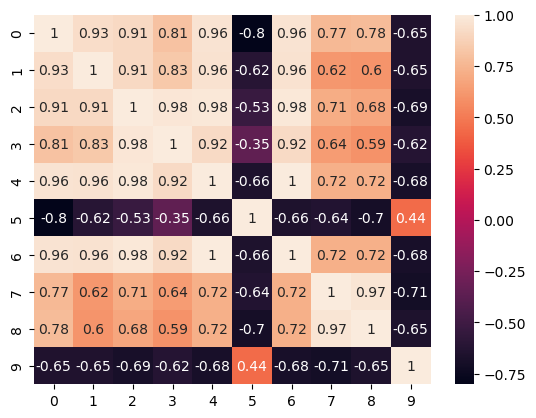

In [48]:


exog_cols  = [ i for i in databook.columns if i != 'Number of orders, millions']

# Определяем независимые переменные (X) и зависимую переменную (Y)
exog = databook[exog_cols]


scale = MinMaxScaler()
exog = scale.fit_transform(exog)
# Определяем независимые переменные (X) и зависимую переменную (Y)
Y = databook['Number of orders, millions']

#exog = add_constant(exog)
# Строим модель с помощью метода наименьших квадратов (OLS)
df2 = pd.DataFrame(exog[:,[i for i in range(20) if i not in [1,3,4,5,6,11,12,13,17,19]]], columns = el_exog_cols,index=databook.index)

model = OLS(Y,df2).fit()

# Выводим результаты модели
sns.heatmap(np.corrcoef(exog[:,[i for i in range(20) if i not in [1,3,4,5,6,11,12,13,17,19]]].T), annot=True)

model.summary()

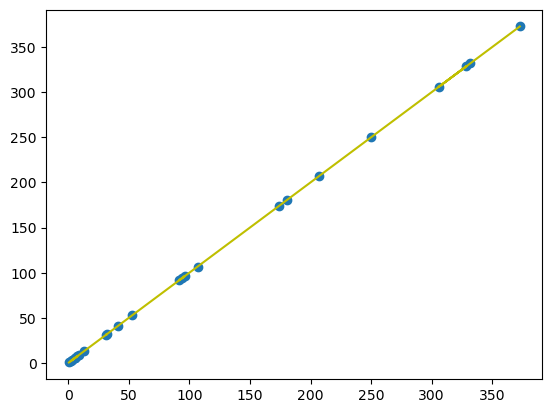

In [ ]:
y = model.model.endog

y = np.linspace(y.min(), y.max(), 24)
y_= model.predict(model.model.exog)

plt.scatter(y_,y_)
plt.plot(y_,y_,c='y')


In [ ]:
exog_cols = np.array(exog_cols)[[i for i in range(20) if i not in [1,3,4,5,6,11,12,13,17,19]]]

In [ ]:
exog_cols

array(['GMV incl. services', 'Number of active buyers, millions',
       'Total current assets', 'Cash and cash equivalents',
       'Total assets', 'Total equity', 'Total equity and liabilities',
       'Movements in working capital1',
       'Net cash (used in) / generated from operating activities1',
       'Net cash (used in)/ generated from investing activities'],
      dtype='<U57')

In [ ]:
print(*exog_cols,sep='\n')

GMV incl. services
Number of active buyers, millions
Total current assets
Cash and cash equivalents
Total assets
Total equity
Total equity and liabilities
Movements in working capital1
Net cash (used in) / generated from operating activities1
Net cash (used in)/ generated from investing activities


In [ ]:
stat, p_value = shapiro(model.resid)
print("Статистика Shapiro-Wilk:", stat)
print("p-значение:", p_value)

if p_value > 0.05:
    print("Распределение данных похоже на нормальное")
else:
    print('Распределение данных отличается от нормального')

Статистика Shapiro-Wilk: 0.9829087422813559
p-значение: 0.9428080635525465
Распределение данных похоже на нормальное


In [ ]:
dw_stat = stats.durbin_watson(model.resid)
print(f"Статистика Дарбина-Уотсона: {dw_stat}")

if dw_stat == 2:
    print('Остатки случайны, автокорреляции нет, и модель хорошо описывает данные.')
elif dw_stat < 2:
    print('Положительная автокорреляция. Это может означать, что модель не учла какие-то временные зависимости, и можно рассмотреть модели, учитывающие структуру автокорреляции (например, авторегрессионные модели)')
else:
    print('Отрицательная автокорреляция. Это редко встречается в эконометрических данных, но может наблюдаться в некоторых временных рядах, где данные колеблются вокруг среднего значения.')

Статистика Дарбина-Уотсона: 2.227518413145096
Отрицательная автокорреляция. Это редко встречается в эконометрических данных, но может наблюдаться в некоторых временных рядах, где данные колеблются вокруг среднего значения.


In [ ]:
r = 1 - dw_stat/2

X = model.model.exog
Y = model.model.endog

model1 = OLS(Y, X).fit()
residuals = model1.resid

# Шаг 2: Оценка коэффициента автокорреляции
rho = np.corrcoef(residuals[1:], residuals[:-1])[0, 1]

# Итерационный процесс
for _ in range(10):  # Максимум 10 итераций, можно остановиться раньше, если разница мала
    Y_transformed = Y[1:] - rho * Y[:-1]
    X_transformed = X[1:] - rho * X[:-1]

    # Переоценка модели на преобразованных данных
    model1 = OLS(Y_transformed, X_transformed).fit()
    residuals = model1.resid

    # Обновляем rho и проверяем условие остановки
    new_rho = np.corrcoef(residuals[1:], residuals[:-1])[0, 1]
    if abs(new_rho - rho) < 1e-5:  # Условие остановки
        break
    rho = new_rho

print("Коэффициент автокорреляции rho:", rho)
print("Модель со схемой AR(1):", model1.summary())

Коэффициент автокорреляции rho: -0.10323233299995692
Модель со схемой AR(1):                                  OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          1.487e+04
Date:                 Вс, 08 дек 2024   Prob (F-statistic):                    1.11e-24
Time:                        23:19:10   Log-Likelihood:                         -45.276
No. Observations:                  23   AIC:                                      110.6
Df Residuals:                      13   BIC:                                      121.9
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t

In [ ]:
# Пример кода для форматирования чисел в выводе
formatted_params = model.params.apply(lambda x: f"{x:.2f}")  # Округление до двух знаков после запятой
print(f'\nКоэффициенты b при каждом члене равны соответственно:\n{formatted_params} .')



Коэффициенты b при каждом члене равны соответственно:
x1           268.46
x2           107.90
x3           416.99
x4          -181.02
x5      10673243.42
x6           -42.94
x7     -10673510.31
x8           -50.42
x9            72.65
x10           17.72
dtype: object .


In [ ]:
# Пример кода для форматирования чисел в выводе
formatted_params = model.pvalues.apply(lambda x: f"{x:.2f}")  # Округление до двух знаков после запятой
print(f'\nP-значения коэффициентов b при каждом члене равны соответственно:\n{formatted_params} .')


P-значения коэффициентов b при каждом члене равны соответственно:
x1     0.00
x2     0.00
x3     0.00
x4     0.00
x5     0.04
x6     0.00
x7     0.04
x8     0.00
x9     0.00
x10    0.00
dtype: object .


In [ ]:
print(f'{model.f_pvalue:.2f}')

0.00


In [ ]:
from scipy.stats import spearmanr

corr, p_value = spearmanr(model.resid, model.model.exog[:, 1])
print(f"Spearman correlation: {corr}")
print(f"p-value: {p_value}")

if p_value < 0.05:
    print("Признаки гетероскедастичности обнаружены.")
else:
    print("Гетероскедастичность не обнаружена.")

Spearman correlation: -0.05826086956521739
p-value: 0.7868436161547347
Гетероскедастичность не обнаружена.


In [ ]:
coefficients = model.params
intercept = 0  # Свободный член, для примера считаем 0

x = pd.DataFrame(exog[:,[i for i in range(20) if i not in [1,3,4,5,6,11,12,13,17,19]]])

X_mean = x.mean().to_numpy()

n = x.shape[0]
X_new = X_mean*1.1

residuals_std = np.sqrt(model.scale)
k = len(coefficients)  # Число независимых переменных
alpha = 0.05  # Уровень значимости

# Вычисление прогноза
y_pred = intercept + np.dot(X_new, coefficients)

# Вычисление стандартной ошибки прогноза
X_diff = X_new - X_mean
se = residuals_std * np.sqrt(1 + (1 / n) + np.sum(X_diff**2) / np.sum((X_mean - np.mean(X_mean))**2))

# Квантиль распределения Стьюдента
t_critical = t.ppf(1 - alpha / 2, df=n - k - 1)

# Доверительный интервал
ci_lower = y_pred - t_critical * se
ci_upper = y_pred + t_critical * se

ci_lower, ci_upper

(120.38674611961844, 130.94808042896537)

In [ ]:
y_pred

125.6674132742919